# 事前準備（データの変換）

In [93]:
in_file = "weather.csv"
out_file = "kion10y.csv"

#CSVファイルを1行ずつ読み込み
with open(in_file, "rt", encoding="Shift_JIS") as fr:
    lines = fr.readlines()
    
# print(lines[0])

#ヘッダーを削ぎ落として新たなヘッダーをつける
lines = ["year, month, day, temp, qual, homog\n"] + lines[1:]
lines = map(lambda v: v.replace('/', ',').replace(' ', ''), lines) #map関数は第一引数の関数に第二引数のlistを代入し、map型オブジェクトで返す関数
#print(list(lines))
result = "".join(lines).strip() #"".join(list(lines))でも可。listに変換は省略可能。strip()は不要なスペースと改行を取り除く関数
print(result)

#結果をファイルへ出力
with open(out_file, "wt", encoding="utf-8") as fw:
    fw.write(result)
    print("saved.")

year,month,day,temp,qual,homog
2009,1,1,5.2,8,1
2009,1,2,6,8,1
2009,1,3,6.8,8,1
2009,1,4,7.5,8,1
2009,1,5,8,8,1
2009,1,6,7.4,8,1
2009,1,7,5.4,8,1
2009,1,8,6.1,8,1
2009,1,9,8.1,8,1
2009,1,10,4.7,8,1
2009,1,11,4.7,8,1
2009,1,12,4.8,8,1
2009,1,13,4.3,8,1
2009,1,14,3.5,8,1
2009,1,15,3.6,8,1
2009,1,16,5.6,8,1
2009,1,17,5.8,8,1
2009,1,18,6.3,8,1
2009,1,19,8.8,8,1
2009,1,20,5.8,8,1
2009,1,21,5.1,8,1
2009,1,22,6.2,8,1
2009,1,23,9.1,8,1
2009,1,24,3.4,8,1
2009,1,25,3.6,8,1
2009,1,26,4.4,8,1
2009,1,27,6.4,8,1
2009,1,28,6.5,8,1
2009,1,29,10.2,8,1
2009,1,30,12.5,8,1
2009,1,31,9.9,8,1
2009,2,1,6.3,8,1
2009,2,2,5.2,8,1
2009,2,3,5.1,8,1
2009,2,4,6.5,8,1
2009,2,5,7.3,8,1
2009,2,6,7.8,8,1
2009,2,7,4.9,8,1
2009,2,8,6.3,8,1
2009,2,9,5.5,8,1
2009,2,10,6.6,8,1
2009,2,11,7.8,8,1
2009,2,12,9.1,8,1
2009,2,13,14.2,8,1
2009,2,14,15.3,8,1
2009,2,15,11.3,8,1
2009,2,16,8,8,1
2009,2,17,3.4,8,1
2009,2,18,5.2,8,1
2009,2,19,6.1,8,1
2009,2,20,8.3,8,1
2009,2,21,5.6,8,1
2009,2,22,6.9,8,1
2009,2,23,9,8,1
2009,2,24,8.4,8,1


# 気温の平均を求める

In [129]:
import pandas as pd
from statistics import mean

#pandasでCSVを読み込む
df = pd.read_csv("kion10y.csv", encoding="utf-8")

print(df.dtypes)
#print(df.columns)
#print(df)

#日付ごとに気温をリストにまとめる
md = {}
for i, row in df.iterrows(): #データを1行ずつ取り出す。この場合、iが行数でrowがデータ自身
    month, day, temp = row['month'], row['day'], row['temp']
    key = str(int(month)) + '/' + str(int(day))
    if not(key in md):
        md[key] = []
    md[key] += [temp]
    
# for key, value in md.items():
#     print(str(key)+str(value))

# 日ずけ毎に平均を求める
avs = {}
for day, temps in md.items():
    average_temp = mean(temps)
#     print("{0}: {1}: {2}".format(day, temps, average_temp))
    avs[day] = average_temp
print(avs)
print(avs['5/25'])

year       int64
month      int64
day        int64
temp     float64
qual       int64
homog      int64
dtype: object
{'1/1': 5.781818181818181, '1/2': 6.74, '1/3': 6.32, '1/4': 5.94, '1/5': 5.73, '1/6': 6.17, '1/7': 5.23, '1/8': 5.81, '1/9': 6.87, '1/10': 5.92, '1/11': 5.5, '1/12': 5.04, '1/13': 4.96, '1/14': 4.42, '1/15': 4.85, '1/16': 4.86, '1/17': 5.71, '1/18': 5.7, '1/19': 5.75, '1/20': 6.17, '1/21': 6.04, '1/22': 5.9, '1/23': 5.75, '1/24': 3.8200000000000003, '1/25': 4.23, '1/26': 4.6000000000000005, '1/27': 5.38, '1/28': 5.49, '1/29': 5.99, '1/30': 6.36, '1/31': 5.67, '2/1': 5.44, '2/2': 6.36, '2/3': 5.81, '2/4': 5.59, '2/5': 5.28, '2/6': 5.38, '2/7': 5.2, '2/8': 4.85, '2/9': 5.34, '2/10': 5.609999999999999, '2/11': 5.07, '2/12': 5.43, '2/13': 6.4, '2/14': 6.6, '2/15': 6.37, '2/16': 5.61, '2/17': 5.95, '2/18': 5.41, '2/19': 5.38, '2/20': 6.35, '2/21': 5.66, '2/22': 7.03, '2/23': 8.66, '2/24': 7.9, '2/25': 8.34, '2/26': 8.29, '2/27': 8.18, '2/28': 8.74, '3/1': 9.16, '3/2': 8.24, '3

# 月ごとの平均を求める

month
1      5.571704
2      6.304610
3      9.682258
4     14.844000
5     19.627742
6     23.339333
7     27.738065
8     28.997097
9     24.722000
10    19.211290
11    13.252667
12     8.053226
Name: temp, dtype: float64


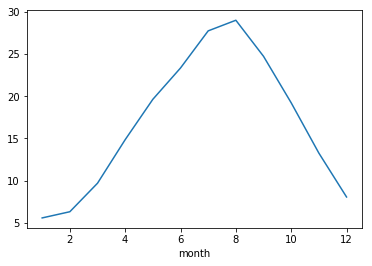

In [164]:
import matplotlib.pyplot as plt
import pandas as pd

#CSVを読み込む
# print(df)

# 月ごとに平均を求める
g = df.groupby(['month'])['temp'].mean()
print(g)

#　結果を出力
g.plot()

# 気温が30度超えの日数を数える

In [176]:
extremely_hot_days = df['temp']>30
extremely_hot_days = df[extremely_hot_days]
print(extremely_hot_days)
extremely_hot_days_count = extremely_hot_days.groupby(['year'])['year'].count()
print(extremely_hot_days_count)

      year  month  day  temp  qual  homog
193   2009      7   13  30.2     8      1
219   2009      8    8  30.2     8      1
568   2010      7   23  30.5     8      1
569   2010      7   24  30.5     8      1
570   2010      7   25  30.7     8      1
577   2010      8    1  30.3     8      1
578   2010      8    2  31.1     8      1
579   2010      8    3  30.2     8      1
580   2010      8    4  30.2     8      1
581   2010      8    5  30.9     8      1
587   2010      8   11  30.3     8      1
590   2010      8   14  30.1     8      1
591   2010      8   15  31.1     8      1
592   2010      8   16  30.7     8      1
593   2010      8   17  31.1     8      1
594   2010      8   18  32.0     8      1
595   2010      8   19  31.8     8      1
596   2010      8   20  31.0     8      1
597   2010      8   21  30.4     8      1
598   2010      8   22  30.6     8      1
599   2010      8   23  31.0     8      1
600   2010      8   24  31.1     8      1
601   2010      8   25  30.5     8